In [2]:
# import packages

In [21]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load Data Freeway 3 ------------------------------------------
data_fw3 = pd.read_csv("output/fw3_2020_north_final(afterSQL).csv")

In [31]:
data_fw3.describe()

,num,startkilo,endkilo,year,crash,lane,minlane,addlane,totalwidth,lanewidth,...,Speed_PCU,heavy_rate,Var_volume,Var_PCU,Var_Speed_volume,Var_Speed_PCU,index,DayType,PeakHour,Hour
count,5.546275e+06,5.546275e+06,5.546275e+06,5546275.0,5.546275e+06,5.546275e+06,5.546275e+06,5.546275e+06,5.546275e+06,5.546275e+06,...,5546275.0,5.546275e+06,5546275.0,5546275.0,5546275.0,5546275.0,5.546275e+06,5.546275e+06,5.546275e+06,5.546275e+06
mean,3.490754e+05,5.416404e+01,5.617735e+01,2020.0,4.860920e-04,3.147684e+00,3.787840e-02,5.304010e-02,1.372344e+01,1.118660e+01,...,0.0,1.173081e-01,0.0,0.0,0.0,0.0,3.490754e+05,3.880983e-01,1.558148e-01,1.145993e+01
std,2.862734e+05,3.174326e+01,3.176598e+01,0.0,2.269504e-02,3.952178e-01,1.909021e-01,2.241135e-01,2.185732e+00,1.725061e+00,...,0.0,1.152480e-01,0.0,0.0,0.0,0.0,2.862734e+05,6.117125e-01,3.626798e-01,6.900813e+00
min,0.000000e+00,0.000000e+00,2.000000e+00,2020.0,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,7.500000e+00,...,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.935200e+04,2.600000e+01,2.800000e+01,2020.0,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.150000e+01,1.070000e+01,...,0.0,4.500000e-02,0.0,0.0,0.0,0.0,8.935200e+04,0.000000e+00,0.000000e+00,5.000000e+00
50%,2.878100e+05,5.400000e+01,5.600000e+01,2020.0,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,1.120000e+01,...,0.0,8.300000e-02,0.0,0.0,0.0,0.0,2.878100e+05,0.000000e+00,0.000000e+00,1.100000e+01
75%,5.378100e+05,8.200000e+01,8.400000e+01,2020.0,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.540000e+01,1.130000e+01,...,0.0,1.430000e-01,0.0,0.0,0.0,0.0,5.378100e+05,1.000000e+00,0.000000e+00,1.700000e+01
max,9.999990e+05,1.080000e+02,1.107030e+02,2020.0,5.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.950000e+01,1.510000e+01,...,0.0,1.000000e+00,0.0,0.0,0.0,0.0,9.999990e+05,2.000000e+00,1.000000e+00,2.300000e+01


# Data pre-process

## Drop data FREEWAY 3

In [32]:
# drop data
data_fw3.drop(['num', 'startkilo', 'endkilo', 'year', 'date', 'starttime', 'endtime'], axis=1, inplace=True)
# Since the values of feature "speed limit" are all the same, we drop the feature
data_fw3.drop(['speedlimit'], axis=1, inplace=True)
data_fw3.drop(['pavement', 'cement', 'remark', 'one'], axis=1, inplace=True)
# unrelated factors
data_fw3.drop(['index'], axis=1, inplace=True)
# drop columns 
data_fw3.drop(['minradiuslength', 'Var_windspeed', 'Var_rain', 'Var_volume', 
               'Var_PCU', 'Var_Speed_volume', 'Var_Speed_PCU'], axis=1, inplace=True)

print(data_fw3.columns)

Index(['crash', 'lane', 'minlane', 'addlane', 'totalwidth', 'lanewidth',
       'inshoulder', 'outshoulder', 'upslope', 'downslope', 'upslopelength',
       'downslopelength', 'maxupslope', 'maxdownslope', 'curvelength',
       'minradius', 'continuouscurve', 'interchange', 'tunnellength',
       'tunnelin', 'tunnelout', 'shouderoallow', 'camera', 'service',
       'windspeed', 'rain', 'volume_S', 'volume_L', 'volume_T', 'volume',
       'PCU', 'Speed_volume', 'Speed_PCU', 'heavy_rate', 'CrashType',
       'DayType', 'PeakHour', 'Hour'],
      dtype='object')


In [33]:
print(data_fw3.dtypes)

crash                int64
lane                 int64
minlane              int64
addlane              int64
totalwidth         float64
lanewidth          float64
inshoulder           int64
outshoulder          int64
upslope            float64
downslope          float64
upslopelength        int64
downslopelength      int64
maxupslope         float64
maxdownslope       float64
curvelength          int64
minradius            int64
continuouscurve      int64
interchange          int64
tunnellength         int64
tunnelin             int64
tunnelout            int64
shouderoallow        int64
camera               int64
service              int64
windspeed          float64
rain               float64
volume_S             int64
volume_L             int64
volume_T             int64
volume               int64
PCU                float64
Speed_volume         int64
Speed_PCU            int64
heavy_rate         float64
CrashType           object
DayType              int64
PeakHour             int64
H

### data['rain'] has many non-numeric values: "&", try to fix them

In [7]:
# data['rain'] has many non-numeric values: "&", try to fix them -> 20220707 has fixed this. 
# data['rain'] = pd.to_numeric(data['rain'], errors='coerce').fillna(0, downcast='float')
# data['windspeed'] = pd.to_numeric(data['windspeed'], errors='coerce').fillna(0, downcast='float')
# data['Speed_volume'] = pd.to_numeric(data['Speed_volume'], errors='coerce').fillna(0, downcast='float')
# data['Speed_PCU'] = pd.to_numeric(data['Speed_PCU'], errors='coerce').fillna(0, downcast='float')
# data['heavy_rate'] = pd.to_numeric(data['heavy_rate'], errors='coerce').fillna(0, downcast='float')

print(data.dtypes)

crash                int64
lane                 int64
minlane              int64
addlane              int64
totalwidth         float64
lanewidth          float64
inshoulder           int64
outshoulder          int64
upslope            float64
downslope          float64
upslopelength        int64
downslopelength      int64
maxupslope         float64
maxdownslope       float64
curvelength          int64
minradius            int64
continuouscurve      int64
interchange          int64
tunnellength         int64
tunnelin             int64
tunnelout            int64
shouderoallow        int64
camera               int64
service              int64
windspeed          float64
rain               float64
volume_S             int64
volume_L             int64
volume_T             int64
volume               int64
PCU                float64
Speed_volume         int64
Speed_PCU            int64
heavy_rate         float64
CrashType           object
DayType              int64
PeakHour             int64
H

In [34]:
print(data_fw3.groupby("CrashType").size())

CrashType
A1          3
A2        188
A3       2432
\N    5543652
dtype: int64


### Convert to categorial type..................

In [37]:
#Convert to categorial type..................
data_fw3["crash"] = data_fw3["crash"].astype("category") 
## !!!!! WARNING!!! ordered = True means the variable is ordered, which means it can be compared. 
## Otherwise, it can not be compared. 
data_fw3["minlane"] = data_fw3["minlane"].astype("category")
data_fw3["addlane"] = data_fw3["addlane"].astype("category")
data_fw3["continuouscurve"] = data_fw3["continuouscurve"].astype("category")
data_fw3["interchange"] = data_fw3["interchange"].astype("category")
data_fw3["tunnelin"] = data_fw3["tunnelin"].astype("category")
data_fw3["tunnelout"] = data_fw3["tunnelout"].astype("category")
data_fw3["shouderoallow"] = data_fw3["shouderoallow"].astype("category")
data_fw3["camera"] = data_fw3["camera"].astype("category")
data_fw3["service"] = data_fw3["service"].astype("category")
data_fw3["DayType"] = data_fw3["DayType"].astype("category")
data_fw3["PeakHour"] = data_fw3["PeakHour"].astype("category")
data_fw3["Hour"] = data_fw3["Hour"].astype("category")

## Correlation heatmap 變數相關性確認

In [38]:
roadGeometryRelatedData = pd.concat([data_fw3['lane'], data_fw3['totalwidth'], data_fw3['lanewidth'],
                                     data_fw3['inshoulder'], data_fw3['outshoulder'], data_fw3['upslopelength'],
                                     data_fw3['downslopelength'], data_fw3['maxupslope'], data_fw3['maxdownslope'], 
                                     data_fw3['curvelength'], data_fw3['minradius'], data_fw3['tunnellength']], axis=1)
trafficFlowRelatedData = pd.concat([data_fw3['PCU'], data_fw3['volume'], data_fw3['volume_S'], data_fw3['volume_T'], data_fw3['volume_L'], data_fw3['heavy_rate']], axis=1) 
weatherRelatedData = pd.concat([data_fw3['windspeed'], data_fw3['rain']], axis=1)

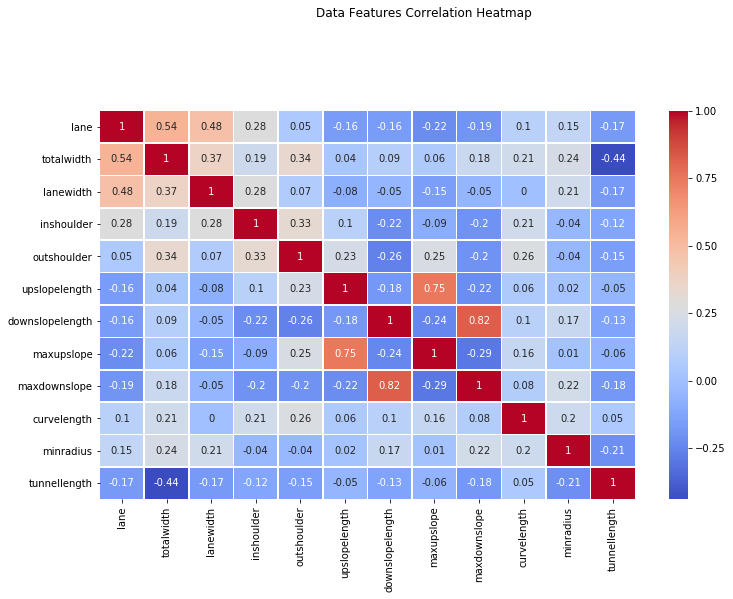

<Figure size 864x864 with 0 Axes>

In [39]:
# draw a heatmap -> roadGeometryRelatedData
corr = roadGeometryRelatedData.corr()
f, ax = plt.subplots(figsize=(12, 8))

plt.figure(figsize=(len(roadGeometryRelatedData.columns), len(roadGeometryRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(12, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

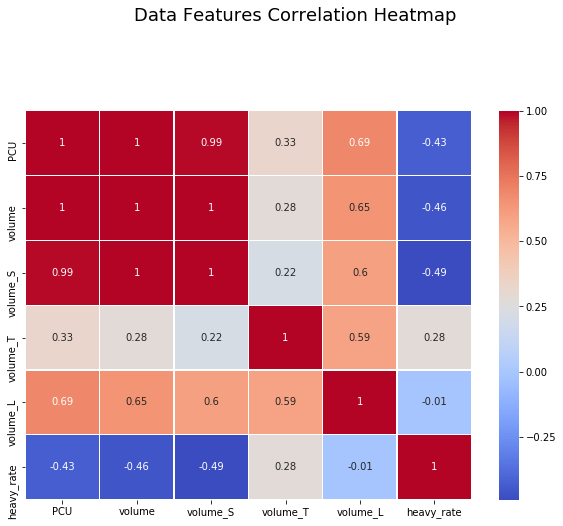

<Figure size 432x432 with 0 Axes>

In [40]:
# draw a heatmap -> trafficRelatedData
corr = trafficFlowRelatedData.corr()
f, ax = plt.subplots(figsize=(10, 8))

plt.figure(figsize=(len(trafficFlowRelatedData.columns), len(trafficFlowRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.3)
f.subplots_adjust(top=0.8)
ax.set_ylim(6, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=18)
plt.show() #畫出熱力圖

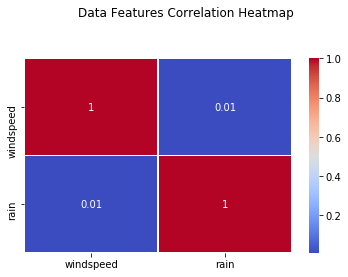

<Figure size 144x144 with 0 Axes>

In [41]:
# draw a heatmap -> trafficRelatedData
corr = weatherRelatedData.corr()
f, ax = plt.subplots(figsize=(6, 4))

plt.figure(figsize=(len(weatherRelatedData.columns), len(weatherRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(2, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

### by correlation analysis results, we delete data['Speed_volume'], data['volume_S'], data['volume_L'] and data['volume_T'] 

In [ ]:
# data.drop(['Speed_volume', 'volume_S', 'volume_T', 'volume_L'], axis=1, inplace=True)

# Before AI prediciton model: Seperare X and Y

### Select features that are used in the model into a list

In [30]:
#Select features that are used in the model into a list
features = list(data.columns)
for feature in ['crash', 'CrashType', 'Speed_volume', 'Speed_PCU']:
    features.remove(feature)  #Remove features
    
print(features)

['lane', 'minlane', 'addlane', 'totalwidth', 'lanewidth', 'inshoulder', 'outshoulder', 'upslope', 'downslope', 'upslopelength', 'downslopelength', 'maxupslope', 'maxdownslope', 'curvelength', 'minradius', 'continuouscurve', 'interchange', 'tunnellength', 'tunnelin', 'tunnelout', 'shouderoallow', 'camera', 'service', 'windspeed', 'rain', 'volume_S', 'volume_L', 'volume_T', 'volume', 'PCU', 'heavy_rate', 'DayType', 'PeakHour', 'Hour']


### (OPTION) Sample Data

In [35]:
data_sample = data.sample(n=1000000)

In [36]:
print(data_sample.groupby("crash").size()) #Check crash number in the sample data

crash
0    999086
1       904
2        10
3         0
dtype: int64


## Imbalanced Data: DownSampling

In [37]:
from sklearn.utils import resample

In [50]:
data_sample["crash"] = data_sample["crash"].astype('int32') #temporarily transform crash data into int32 -> for downsampling
no_crash = data_sample[data_sample.crash==0]
crash = data_sample[data_sample.crash>=1]
print(no_crash)

         crash  lane minlane addlane  totalwidth  lanewidth  inshoulder  \
262035       0     2       0       0         8.0        7.5           0   
4143296      0     3       0       0        15.3       11.3           1   
2856853      0     4       1       1        14.5       10.4           1   
3414306      0     3       0       0        12.0       11.3           1   
3345433      0     3       0       0        12.0       11.3           1   
...        ...   ...     ...     ...         ...        ...         ...   
1379559      0     2       0       0         8.5        7.5           1   
2811544      0     2       0       1         8.3        7.5           1   
4060571      0     3       0       0        15.3       11.3           1   
588179       0     3       0       0        12.1       11.1           1   
2005         0     2       0       0         8.5        7.5           1   

         outshoulder  upslope  downslope  ...  volume_T  volume    PCU  \
262035             0     

In [51]:
data_sample["crash"] = data_sample["crash"].astype("category") 

In [52]:
# downsample majority
no_crash_downsampled = resample(no_crash,
                          replace=False, # sample with replacement
                          n_samples=len(crash)*1, # match number in majority class
                          random_state=27) # reproducible results


In [53]:
# combine minority and downsampled majority
downsampled = pd.concat([no_crash_downsampled, crash])

In [54]:
down_Y = downsampled['crash']
down_X = downsampled.drop(['crash'], axis = 1)

In [55]:
#確認兩類別數目相同
print(downsampled.crash.value_counts())

0    914
1    904
2     10
Name: crash, dtype: int64


In [56]:
#確認資料內容
print(down_X.head())
print(down_Y.head())

         lane minlane addlane  totalwidth  lanewidth  inshoulder  outshoulder  \
192840      3       0       0        14.4       10.9           0            0   
891911      3       0       0        15.4       11.4           1            3   
4994730     3       0       0        13.7       11.0           1            0   
2198220     3       0       0        13.7       11.0           1            0   
4985643     3       0       0        15.2       11.1           1            3   

         upslope  downslope  upslopelength  ...  volume_T  volume    PCU  \
192840       2.0        2.0             11  ...        12     118  139.0   
891911       0.0        0.0              0  ...         6     408  427.8   
4994730      0.0        0.0              0  ...        20     143  179.8   
2198220      0.0        0.0              0  ...        19     508  545.6   
4985643      0.0        0.0              0  ...         9     440  462.8   

         Speed_volume  Speed_PCU heavy_rate CrashType  D

### Seperate X and Y data

In [58]:
data_Y = data_sample['crash']
data_X = data_sample[features] 

In [ ]:
data_Y.describe()

###  DO NOT NEED TO MANUALLY CONVERT FEATURES INTO DUMMY VARIABLES
* all categorial types will automatically convert to categorial variable 

In [57]:
print(f"X = {data_X.columns}")

NameError: name 'data_X' is not defined

In [ ]:
data_X.fillna(0, inplace=True)

In [ ]:
data_X.isna().any()

# Prediction: SVM

In [59]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1)
accuracy = cross_val_score(svc,down_X,down_Y,cv=5,scoring="accuracy")
F1 = cross_val_score(svc,down_X,down_Y,cv=5,scoring="f1")
precision = cross_val_score(svc,down_X,down_Y,cv=5,scoring="precision")
recall = cross_val_score(svc,down_X,down_Y,cv=5,scoring="recall")

print("accuracy = ",accuracy)
print("accuracy_mean = ",accuracy.mean())
print("F1 = ",F1)
print("precision = ",precision)
print("recall = ",recall)

C:\Users\WangRabbit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'A3'

# Prediction: Linear Regression

### convert crash values to 1

In [ ]:
# replace crash values
## convert crash values to 1
data.loc[data["crash"] >= 1, "crash"] = 1 

### convert it to .. 

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
model=sm.Logit(y_train,X_train,random_state=0)
result=model.fit()
print(result.summary())

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))